# Linear Models

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(dm)
reload(ut)
reload(sl)
print ''

In [3]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

One of the most fundamental kinds of machine learning is the construction of a model that can be used to summarize a set of data.   

The most common form of modeling is __regression__, which means constructing an equation that describes the relationships among variables.

For example, we may look at these points and decide to model them using a line.

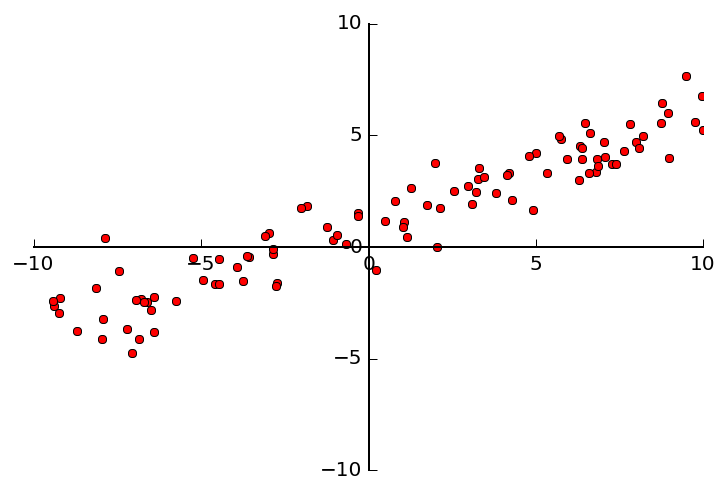

In [37]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
ax.plot(xlin,ylin,'ro',markersize=4)
print ''

We may look at these points and decide to model them using a quadratic function.

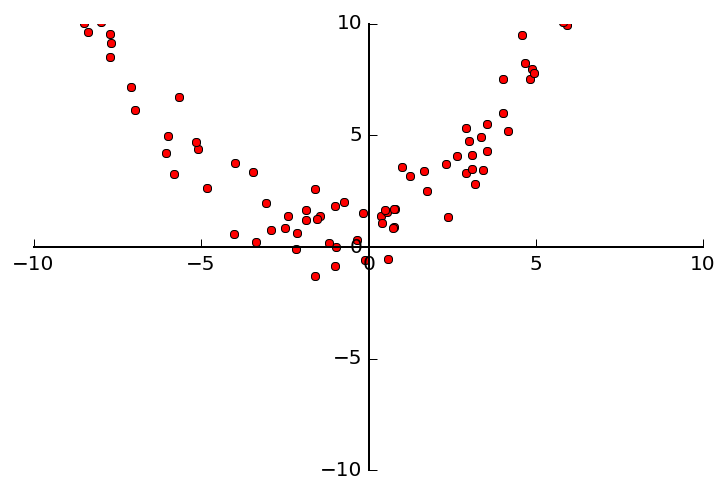

In [38]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
quad = np.array([1, 0.5, 0.2])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0]+(quad[1]*xquad)+(quad[2]*xquad*xquad)+np.random.randn(100)
ax.plot(xquad,yquad,'ro',markersize=4)
print ''

And we may look at these points and decide to model them using a logarithmic function.

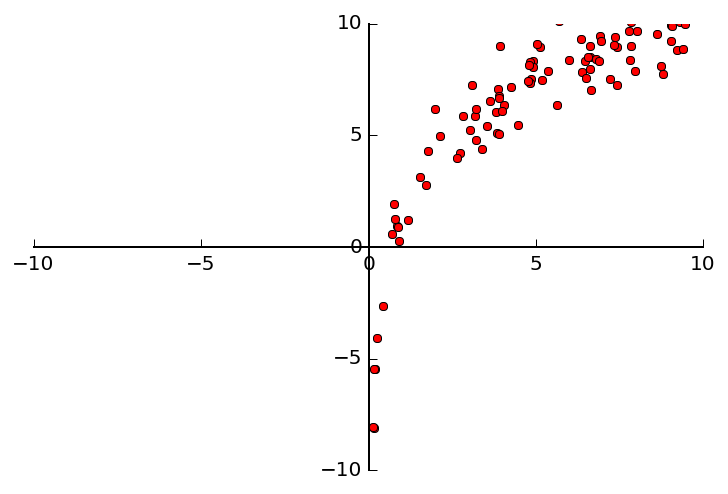

In [39]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
log = np.array([1, 4])
xlog = 10.0 * np.random.random(100)
ylog = log[0]+log[1]*np.log(xlog)+np.random.randn(100)
ax.plot(xlog,ylog,'ro',markersize=4)
print ''

Clearly, none of these datasets agrees perfectly with the proposed model.   So the question arises:

How do we find the __best__ linear function (or quadratic function, or logarithmic function) given the data?

__Framework.__

This problem has been studied extensively in the field of statistics.   Certain terminology is used:

* Some values are referred to as "independent," and
* Some values are referred to as "dependent."

The basic regression task is: given a set of independent variables and the associated dependent variables, estimate the parameters of a model (such as a line, parabola, etc) that describes how the dependent variables are related to the independent variables.


The dependent variables are collected into a matrix $X,$ which is called the __design matrix.__

The independent variables are collected into a vector $\vy.$

The parameters of the model (for any kind of model) are collected into a vector $\beta.$

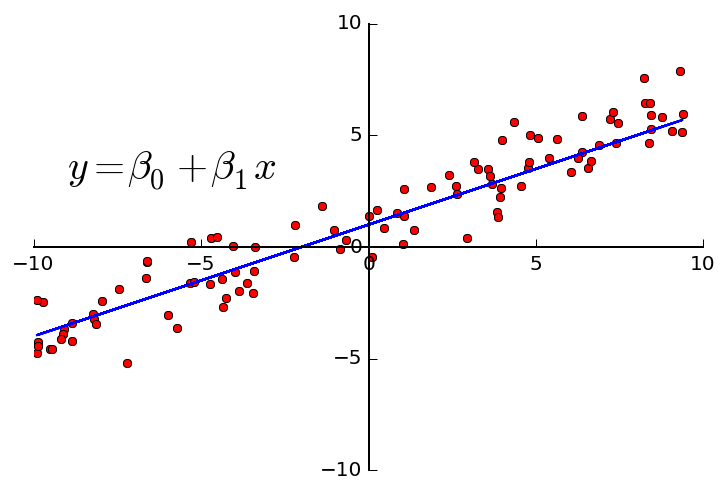

In [46]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-10,10,-10,10)
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
ax.plot(xlin,ylin,'ro',markersize=4)
ax.plot(xlin,line[0]+line[1]*xlin,'b-')
plt.text(-9,3,r'$y = \beta_0 + \beta_1x$',size=20)
print ''